# Chapter 11 Contours

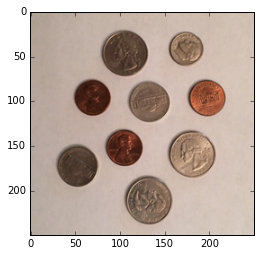

In [18]:
import numpy as np
import mahotas
import cv2
import matplotlib.pyplot as plt

def pltShow(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

def pltShowGray(img):
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    plt.imshow(img)

image = cv2.imread("../../images/coins.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (11, 11), 0)
pltShow(image)

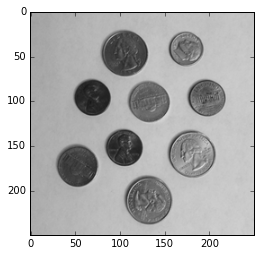

In [19]:
pltShowGray(gray)

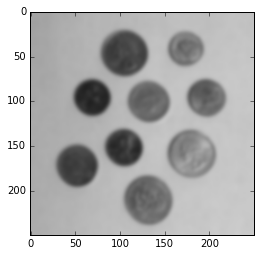

In [20]:
pltShowGray(blurred)

## Getting the edge

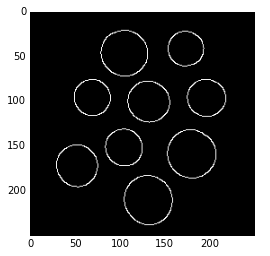

In [21]:
edge = cv2.Canny(blurred, 30, 150)
pltShowGray(edge)

## Find the corners

Nombre de coins trouvés : 9


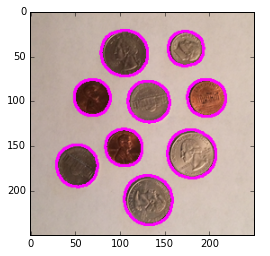

In [22]:
(_, cnts, _) = cv2.findContours(edge.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Nombre de coins trouvés : " + str(len(cnts)))

coins = image.copy()
cv2.drawContours(coins, cnts, -1, (255, 0, 255), 2)
pltShow(coins)

## Cropping

In [37]:
mask = np.zeros(image.shape[:2], dtype = "uint8")

liste = []

for (i, c) in enumerate(cnts):
    (x, y, w, h) = cv2.boundingRect(c)
    
    coin = image[y:y + h, x:x + w]
    
    ((centerX, centerY), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(mask, (int(centerX), int(centerY)), int(radius), 255, -1)
    mask2 = mask[y:y + h, x:x + w]
    liste.append(cv2.bitwise_and(coin, coin, mask = mask2))

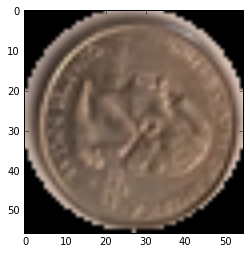

In [38]:
pltShow(liste[0])

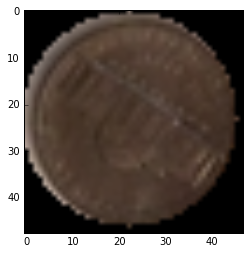

In [39]:
pltShow(liste[1])

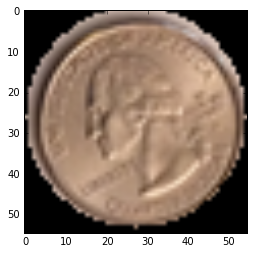

In [40]:
pltShow(liste[2])

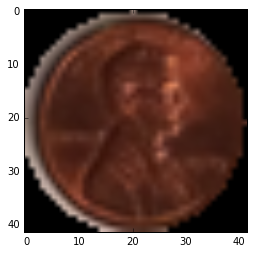

In [41]:
pltShow(liste[3])

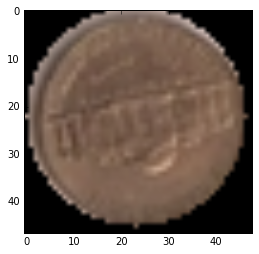

In [42]:
pltShow(liste[4])

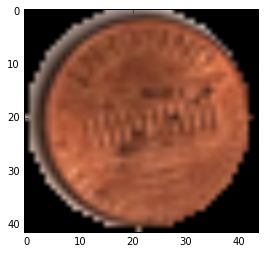

In [43]:
pltShow(liste[5])

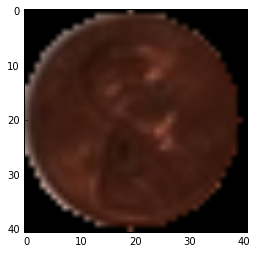

In [44]:
pltShow(liste[6])

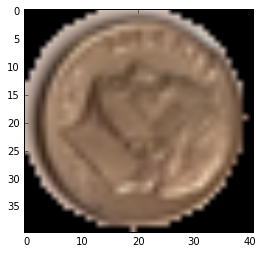

In [45]:
pltShow(liste[7])

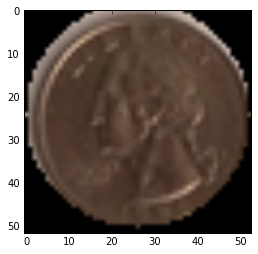

In [46]:
pltShow(liste[8])